In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/resnet-dataset/images/image2.jpg
/kaggle/input/resnet-dataset/images/car.jpg
/kaggle/input/resnet-dataset/images/Image1.jpg
/kaggle/input/resnet-dataset/images/image11.jpg
/kaggle/input/resnet-dataset/images/Image3.jpg
/kaggle/input/resnet-dataset/images/image6.jpg
/kaggle/input/resnet-dataset/images/image4.jpg
/kaggle/input/resnet-dataset/images/image9.jpg
/kaggle/input/resnet-dataset/images/image8.jpg
/kaggle/input/resnet-dataset/images/Scooter.jpg
/kaggle/input/resnet-dataset/images/image10.jpg
/kaggle/input/resnet-dataset/images/banana.jpg


In [2]:
# ResNet50

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import decode_predictions
from keras.applications.resnet50 import preprocess_input

from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from PIL import Image as PImage

In [3]:
os.getcwd()

'/kaggle/working'

In [4]:
img_width, img_height = 224, 224

model_pretrained = ResNet50(weights='imagenet',
                            include_top=True,
                            input_shape=(img_height, img_width, 3))

# Insert correct path of your image below
img_path = '/kaggle/input/resnet-dataset/images/Image1.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)



102973440/102967424 [==============================] - 2s 0us/step


40960/35363 [==================================] - 0s 0us/step


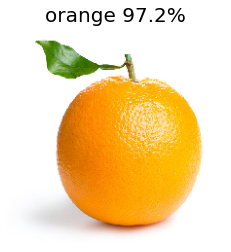

Predicted: [('n07747607', 'orange', 0.9723446), ('n07749582', 'lemon', 0.027496148), ('n07753592', 'banana', 8.508897e-05)]


In [5]:
# predict the result
cnn_feature = model_pretrained.predict(img_data, verbose=0)
# decode the results into a list of tuples (class, description, probability)
label = decode_predictions(cnn_feature)
label = label[0][0]

plt.imshow(img)

stringprint = "%.1f" % round(label[2] * 100, 1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
plt.axis('off')
plt.show()

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(cnn_feature, top=3)[0])



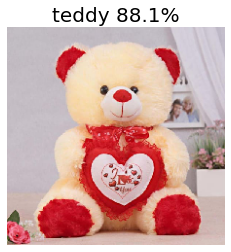

Predicted: [('n04399382', 'teddy', 0.8813087), ('n03026506', 'Christmas_stocking', 0.039809838), ('n03482405', 'hamper', 0.01754158)]


In [6]:

# Insert correct path of your image below
img_path = '/kaggle/input/resnet-dataset/images/Image3.jpg'
img = image.load_img(img_path, target_size=(img_width, img_height))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

# predict the result
cnn_feature = model_pretrained.predict(img_data, verbose=0)
# decode the results into a list of tuples (class, description, probability)
label = decode_predictions(cnn_feature)
label = label[0][0]

plt.imshow(img)

stringprint = "%.1f" % round(label[2] * 100, 1)
plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
plt.axis('off')
plt.show()

# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(cnn_feature, top=3)[0])


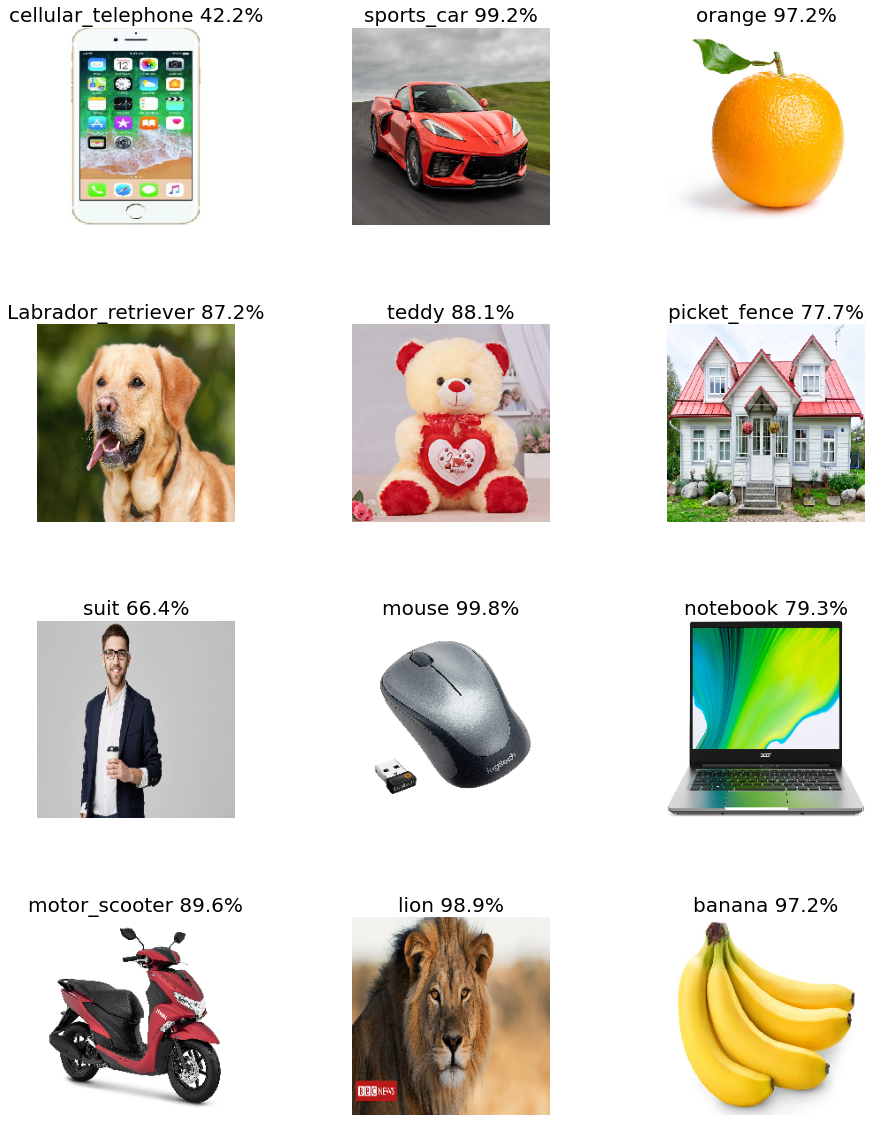

In [7]:

# Insert correct path of your image folder below

folder_path = '/kaggle/input/resnet-dataset/images/'
images = os.listdir(folder_path)
fig = plt.figure(figsize=(16, 20))
i = 0
rows = 4
columns = 3

for image1 in images:
    if image1 == ".ipynb_checkpoints":
      continue
    i += 1

    
    img = image.load_img(folder_path + image1, target_size=(img_width, img_height))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    cnn_feature = model_pretrained.predict(img_data, verbose=0)
    label = decode_predictions(cnn_feature)
    label = label[0][0]

    fig.add_subplot(rows, columns, i)
    fig.subplots_adjust(hspace=.5)

    plt.imshow(img)
    stringprint = "%.1f" % round(label[2] * 100, 1)
    plt.title(label[1] + " " + str(stringprint) + "%", fontsize=20)
    plt.axis('off')
plt.show()

**Thank You!**